In [1]:
import pandas as pd
# linear algebra
import numpy as np
# preprocessing
from sklearn.preprocessing import LabelEncoder

# spliting the data into two part train and test 
from sklearn.model_selection import train_test_split
# import the Requried Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sn

# Getting the data 

In [2]:
df=pd.read_csv(r"D:\Machine Learning-all\Machine Learning\DataSets\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


# Data Exploration/Analysis 

In [3]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

#  Let’s take a more detailed look at what data is actually missing

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

#####  only Age column have  missing values 177, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. it looks like that we might want to drop it from the dataset.

In [5]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age',
       'SibSp', 'Parch', 'Fare'], dtype=object)

In [6]:
df=df.drop(['PassengerId','Name','SibSp','Parch'],axis=1)
df.head()

,Survived,Pclass,Gender,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


# Label encoding 

In [7]:
label=LabelEncoder()
df.Gender=label.fit_transform(df.Gender)

In [8]:
df.Age.median()

28.0

In [9]:
df.Age=df.fillna(df.Age.median())
df.head()

,Survived,Pclass,Gender,Age,Fare
0,0,3,1,0.0,7.2500
1,1,1,0,1.0,71.2833
2,1,3,0,1.0,7.9250
3,1,1,0,1.0,53.1000
4,0,3,1,0.0,8.0500


In [13]:
x=df.drop('Survived',axis=1)
y=df.Survived

c:\python37\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
c:\python37\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\python37\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python37\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\python37\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python37\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\python37\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid val

Text(0.5,1,'Male')

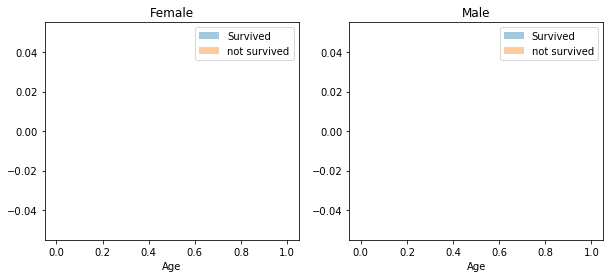

In [14]:
survived = 'Survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Gender']=='female']
men = df[df['Gender']=='male']
ax = sn.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sn.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sn.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sn.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [15]:
x_train,x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
print(len(x_train))
print(len(y_test))

623
268


In [17]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
model.predict(x_test)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0], dtype=int64)

In [19]:
model.score(x_test,y_test)

1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F6F4A4188>,
      dtype=object)

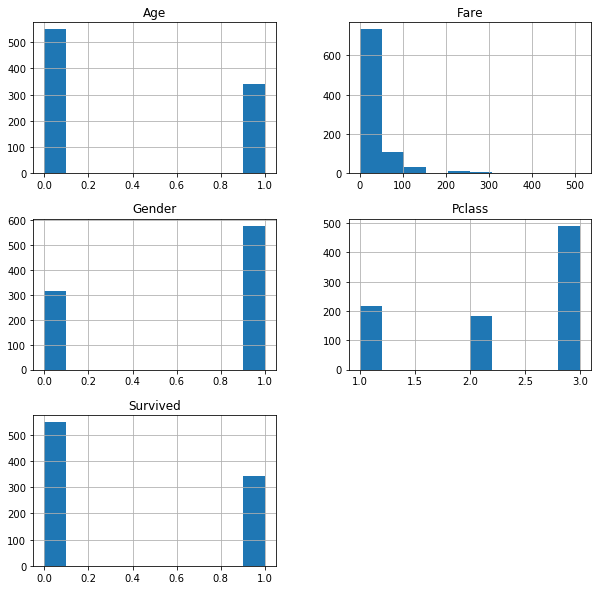

In [20]:
df.hist(figsize=(10,10),bins=10)

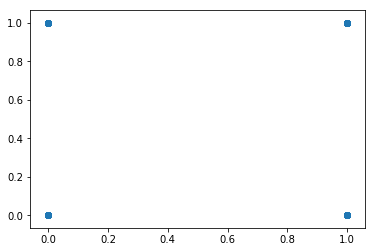

In [21]:
plt.scatter(df.Gender,df.Survived)

In [22]:
model.score(x_train,y_train)

1.0

In [23]:
# Appling Random forest classifier

rfc=RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [24]:
rfc.score(x_train,y_train)

1.0

In [25]:
rfc.score(x_test,y_test)

1.0